In [1]:
import torch
import random
import pandas as pd
import numpy as np
from IPython.display import clear_output
import torch
from torchvision import transforms

In [2]:
from PIL import Image

our_banana_raw = Image.open('/Users/ted.taylor/Downloads/ban.jpg')
print(f"Original size : {our_banana_raw.size}") # 5464x3640

our_banana = our_banana_raw.resize((256, 256))

white_image = our_banana_raw.resize((256, 256))
for i in range(0,255):
    for j in range(0,255):
        white_image.load()[i,j] = (255,255,255)
black_image = our_banana_raw.resize((256, 256))
for i in range(0,255):
    for j in range(0,255):
        black_image.load()[i,j] = (0,0,0)


Original size : (1200, 1057)


In [3]:
from image import Image, pred

Using cache found in /Users/ted.taylor/.cache/torch/hub/pytorch_vision_v0.10.0
/Users/ted.taylor/opt/anaconda3/envs/envAltair/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/ted.taylor/opt/anaconda3/envs/envAltair/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
im = Image(our_banana)

In [5]:
type(im.matrix)

PIL.Image.Image

In [6]:
type(im)

image.Image

In [8]:
result =  im.trick99('lemon')

change no.236
old n_sub1_value: 94.78070831298828
new n_sub1_value: 95.03263854980469
Finished - After 237 changes


object -> image
attributes - pixel vals
           - size
methods:
    resize(what x, y)
    predict()
    1-pixel-fool(what %)
    palce-pixel(color, location)
    place-circle(color, location, size)
    
    

In [3]:
def imageResize(image_param):
    
    from torchvision import transforms
    #
    # Create a preprocessing pipeline
    #
    preprocess = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])
    #
    # Pass the image for preprocessing and the image preprocessed
    #
    img_cat_preprocessed = preprocess(image_param)
    return img_cat_preprocessed

In [6]:
def pred(image_param):
    img_cat_preprocessed = imageResize(image_param)
    #
    # Reshape, crop, and normalize the input tensor for feeding into network for evaluation
    #
    batch_img_cat_tensor = torch.unsqueeze(img_cat_preprocessed, 0)

    model.eval()
    #
    # Get the predictions of image as scores related to how the loaded image
    # matches with 1000 ImageNet classes. The variable, out is a vector of 1000 scores
    #
    out = model(batch_img_cat_tensor)

    # Load the file containing the 1,000 labels for the ImageNet dataset classes
    #
    with open('/Users/ted.taylor/Downloads/imagenet_classes.txt') as f:
        labels = [line.strip() for line in f.readlines()]
    #
    # Find the index (tensor) corresponding to the maximum score in the out tensor.
    # Torch.max function can be used to find the information
    #
    _, index = torch.max(out, 1)
    #
    # Find the score in terms of percentage by using torch.nn.functional.softmax function
    # which normalizes the output to range [0,1] and multiplying by 100
    #
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    #
    # Print the name along with score of the object identified by the model
    #
    #print(labels[index[0]], percentage[index[0]].item())
    #
    # Print the top 5 scores along with the image label. Sort function is invoked on the torch to sort the scores.
    #
    _, indices = torch.sort(out, descending=True)
    preds = [(labels[idx], percentage[idx].item()) for idx in indices[0][:]]
    
    return (preds)

In [6]:

def trick99(image_param, name_param):
    
    name = name_param
    run_image = image_param.resize((256, 256))
    n_sub1_pred = pred(run_image)
    n_sub1_value = [item for item in n_sub1_pred if item[0] == name][0][1]
    k=0
    while (n_sub1_pred[0][0] != name) or (n_sub1_pred[0][1] < 90):
        clear_output(wait=True)

        x_rand = random.randint(0, 255)
        y_rand = random.randint(0, 255)

        r_rand = random.randint(0, 255)
        g_rand = random.randint(0, 255)
        b_rand = random.randint(0, 255)

        old_pixel_val = run_image.load()[x_rand,y_rand]
        new_pixel_val = (r_rand,g_rand,b_rand)

        run_image.load()[x_rand,y_rand] = (r_rand,g_rand,b_rand)
        current_pred = pred(run_image)
        current_value = [item for item in current_pred if item[0] == name][0][1]

        if current_value > n_sub1_value:
            print(f"change no.{k}")
            print(f"old n_sub1_value: {n_sub1_value}")
            #print(f"BETTER ({x_rand},{y_rand}) old: {old_pixel_val}  new: {new_pixel_val}")
            n_sub1_pred = current_pred
            n_sub1_value = current_value

            print(f"new n_sub1_value: {n_sub1_value}")
            k=k+1
        else:
            run_image.load()[x_rand,y_rand] = old_pixel_val
            #print(f"WORSE ({x_rand},{y_rand}) old: {old_pixel_val}  new: {new_pixel_val}")

    print(f'Finished - After {k} changes')
    return ([pred(image_param.resize((256, 256))),pred(run_image),run_image])

def trick(image_param, name_param):
    
    name = name_param
    run_image = image_param.resize((256, 256))
    n_sub1_pred = pred(run_image)
    n_sub1_value = [item for item in n_sub1_pred if item[0] == name][0][1]
    k=0
    while n_sub1_pred[0][0] != name:
        clear_output(wait=True)

        x_rand = random.randint(0, 255)
        y_rand = random.randint(0, 255)

        r_rand = random.randint(0, 255)
        g_rand = random.randint(0, 255)
        b_rand = random.randint(0, 255)

        old_pixel_val = run_image.load()[x_rand,y_rand]
        new_pixel_val = (r_rand,g_rand,b_rand)

        run_image.load()[x_rand,y_rand] = (r_rand,g_rand,b_rand)
        current_pred = pred(run_image)
        current_value = [item for item in current_pred if item[0] == name][0][1]

        if current_value > n_sub1_value:
            print(f"change no.{k}")
            print(f"old n_sub1_value: {n_sub1_value}")
            #print(f"BETTER ({x_rand},{y_rand}) old: {old_pixel_val}  new: {new_pixel_val}")
            n_sub1_pred = current_pred
            n_sub1_value = current_value

            print(f"new n_sub1_value: {n_sub1_value}")
            k=k+1
        else:
            run_image.load()[x_rand,y_rand] = old_pixel_val
            #print(f"WORSE ({x_rand},{y_rand}) old: {old_pixel_val}  new: {new_pixel_val}")

    print(f'Finished - After {k} changes')
    return ([pred(image_param.resize((256, 256))),pred(run_image),run_image])

In [ ]:

result = trick(og_image.resize((256, 256)),'eggnog')

In [8]:
white99 = white.copy()
white_result = trick99(white99, 'hourglass')

KeyboardInterrupt: 

In [9]:


hue_dict = {'red':(255,0,0),
 'yellow': (255,255,0),
 'pink': (255,0,255),
 'green': (0,255,0),
 'orange': (255,128,0),
 'purple': (127,0,255),
 'blue': (0,0,255),
 'brown': (102,51,0),
 'grey': (128,128,128),
 'white': (255,255,255),
 'black': (0,0,0)}

step_weight = 0.5
min_width_weight=20
max_width_weight=100

LIKENESS_TARGET = 96

def placeRandCircle(image_param,color):
    
    min_width = min_width_weight
    max_width = max_width_weight
    size_rand = random.randint(min_width, max_width)

    
    x_rand = random.randint(0, 255-size_rand)
    y_rand = random.randint(0,255-size_rand)

    r_rand = random.randint(0, 255)
    g_rand = random.randint(0, 255)
    b_rand = random.randint(0, 255)

    from PIL import Image, ImageDraw
    draw = ImageDraw.Draw(image_param)

    draw.ellipse((x_rand, y_rand, x_rand+size_rand, y_rand+size_rand), fill=color)
    

def genImage(image_param, item_param):
    k=0
    place_count=0
    item=item_param

    prev_image = image_param
    prev_image_value = dict(pred(prev_image))[item]
    
    while(prev_image_value<LIKENESS_TARGET):
        clear_output(wait=True)
        
        
        add_red_image = prev_image.copy()
        placeRandCircle(add_red_image,hue_dict['red'])
        add_red_image_value = dict(pred(add_red_image))[item]
        place_count+=1
        if (add_red_image_value > prev_image_value+step_weight):
            prev_image = add_red_image.copy()
            print(f'Attempt:{place_count} Placement:{k} prev:',prev_image_value, 'current:', add_red_image_value)
            prev_image_value = add_red_image_value
            k=k+1
            continue

        add_yellow_image = prev_image.copy()
        placeRandCircle(add_yellow_image,hue_dict['yellow'])
        add_yellow_image_value = dict(pred(add_yellow_image))[item]
        place_count+=1
        if (add_yellow_image_value > prev_image_value+step_weight):
            prev_image = add_yellow_image.copy()
            print(f'Attempt:{place_count} Placement:{k} prev:',prev_image_value, 'current:', add_yellow_image_value)
            prev_image_value = add_yellow_image_value
            k=k+1
            continue

        add_pink_image = prev_image.copy()
        placeRandCircle(add_pink_image,hue_dict['pink'])
        add_pink_image_value = dict(pred(add_pink_image))[item]
        place_count+=1
        if (add_pink_image_value > prev_image_value+step_weight):
            prev_image = add_pink_image.copy()
            print(f'Attempt:{place_count} Placement:{k} prev:',prev_image_value, 'current:', add_pink_image_value)
            prev_image_value = add_pink_image_value
            k=k+1
            continue

        add_green_image = prev_image.copy()
        placeRandCircle(add_green_image,hue_dict['green'])
        add_green_image_value = dict(pred(add_green_image))[item]
        place_count+=1
        if (add_green_image_value > prev_image_value+step_weight):
            prev_image = add_green_image.copy()
            print(f'Attempt:{place_count} Placement:{k} prev:',prev_image_value, 'current:', add_green_image_value)
            prev_image_value = add_green_image_value
            k=k+1
            continue
            
        add_orange_image = prev_image.copy()
        placeRandCircle(add_orange_image,hue_dict['orange'])
        add_orange_image_value = dict(pred(add_orange_image))[item]
        place_count+=1
        if (add_orange_image_value > prev_image_value+step_weight):
            prev_image = add_orange_image.copy()
            print(f'Attempt:{place_count} Placement:{k} prev:',prev_image_value, 'current:', add_orange_image_value)
            prev_image_value = add_orange_image_value
            k=k+1
            continue
            
        add_purple_image = prev_image.copy()
        placeRandCircle(add_purple_image,hue_dict['purple'])
        add_purple_image_value = dict(pred(add_purple_image))[item]
        place_count+=1
        if (add_purple_image_value > prev_image_value+step_weight):
            prev_image = add_purple_image.copy()
            print(f'Attempt:{place_count} Placement:{k} prev:',prev_image_value, 'current:', add_purple_image_value)
            prev_image_value = add_purple_image_value
            k=k+1
            continue
            
        add_blue_image = prev_image.copy()
        placeRandCircle(add_blue_image,hue_dict['blue'])
        add_blue_image_value = dict(pred(add_blue_image))[item]
        place_count+=1
        if (add_blue_image_value > prev_image_value+step_weight):
            prev_image = add_blue_image.copy()
            print(f'Attempt:{place_count} Placement:{k} prev:',prev_image_value, 'current:', add_blue_image_value)
            prev_image_value = add_blue_image_value
            k=k+1
            continue
            
        add_brown_image = prev_image.copy()
        placeRandCircle(add_brown_image,hue_dict['brown'])
        add_brown_image_value = dict(pred(add_brown_image))[item]
        place_count+=1
        if (add_brown_image_value > prev_image_value+step_weight):
            prev_image = add_brown_image.copy()
            print(f'Attempt:{place_count} Placement:{k} prev:',prev_image_value, 'current:', add_brown_image_value)
            prev_image_value = add_brown_image_value
            k=k+1
            continue
            
        add_grey_image = prev_image.copy()
        placeRandCircle(add_grey_image,hue_dict['grey'])
        add_grey_image_value = dict(pred(add_grey_image))[item]
        place_count+=1
        if (add_grey_image_value > prev_image_value+step_weight):
            prev_image = add_grey_image.copy()
            print(f'Attempt:{place_count} Placement:{k} prev:',prev_image_value, 'current:', add_grey_image_value)
            prev_image_value = add_grey_image_value
            k=k+1
            continue
            
        add_white_image = prev_image.copy()
        placeRandCircle(add_white_image,hue_dict['white'])
        add_white_image_value = dict(pred(add_white_image))[item]
        place_count+=1
        if (add_white_image_value > prev_image_value+step_weight):
            prev_image = add_white_image.copy()
            print(f'Attempt:{place_count} Placement:{k} prev:',prev_image_value, 'current:', add_white_image_value)
            prev_image_value = add_white_image_value
            k=k+1
            continue
            
        add_black_image = prev_image.copy()
        placeRandCircle(add_black_image,hue_dict['black'])
        add_black_image_value = dict(pred(add_black_image))[item]
        place_count+=1
        if (add_black_image_value > prev_image_value+step_weight):
            prev_image = add_black_image.copy()
            print(f'Attempt:{place_count} Placement:{k} prev:',prev_image_value, 'current:', add_black_image_value)
            prev_image_value = add_black_image_value
            k=k+1
            continue
        
    
    print(f'Finished - After {k} changes')
    return ([pred(image_param),pred(prev_image),prev_image])

In [10]:
result2 = genImage(white.copy(),'acorn')

Attempt:2459 Placement:16 prev: 94.90644073486328 current: 96.3474349975586
Finished - After 17 changes


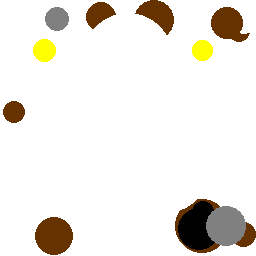

In [11]:
result2[2]

In [10]:
result2[0][0:5]

[('corkscrew', 1.8588545322418213),
 ('hook', 1.1945443153381348),
 ('hair slide', 1.153014063835144),
 ('nail', 1.1527196168899536),
 ('whistle', 1.0341063737869263)]

In [50]:
test=white.copy()

In [51]:
placeRandCircle(test,'red')

In [64]:
data = np.asarray(test)

In [69]:
data.shape

(256, 256, 3)

# ideas
<br>- Count what colors and sizes using in plots - once it gets to 25% restart with most common color-size weights increased proba
<br>- use k counter to nudge out of a local minimum - create thick white border around edge of image to nudge along
<br>- total pixel value count - if less than 1/4 of pixels != 255,255,255 at 25% restart process (avoids creating small objects/ noise)

In [74]:
256*256*(255*3)

50135040

In [72]:
data.sum()

46682850

In [2]:
image = [[1,0,0,0,0,0],
         [0,1,0,1,1,1],
         [0,0,1,0,1,0],
         [1,1,0,0,1,0],
         [1,0,1,1,0,0],
         [1,0,0,0,0,1]]


In [68]:
for row in range(0,len(image)):
    for column in image[row]:
        print(column)c